In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from matplotlib import cm


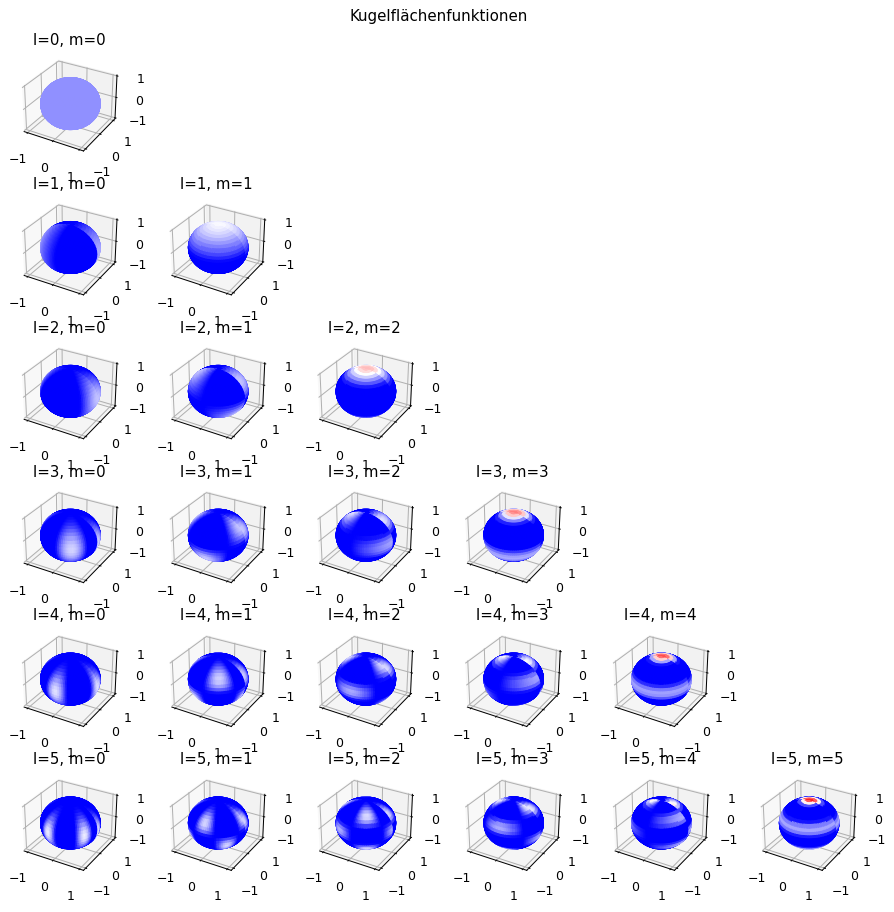

In [2]:
L = 5

# Die Kugelflächenfunktionen sind Funktionen von Theta, Phi, also initialisieren wir einen Wertebereich:
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2*np.pi, 50)

# Mit Meshgrid erstellen wir eine Matrix der Koordinatenvektoren von Theta, Phi. vgl dazu die Dokumentation: 
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
Theta, Phi = np.meshgrid(theta, phi)

# Theoretisch wären auch Größere Kugeln als die Einheitskugel Möglich, deshalb für einfache Anpassung des Codes einen radius Parameter
R = 1


# Die Funktion, die den Plot erstellt braucht Karthesische Koordinaten, deshalb eine Konvertierung
X = R* np.cos(Theta)*np.sin(Phi)
Y = R* np.sin(Theta)*np.sin(Phi)
Z = R* np.cos(Phi)


# Initialisiere ein Plot mit (L + 1)* (L + 1) Feldern (Subplots)
# Diese Subplots können alle Separat angepasst werden
# Es gibt viele Anpassungsmöglichkeiten, subplot_kw wird beispielsweise an alle Subplots übergeben, 
# dpi und figsize werden hingegen an die Figure übergeben. Auch hierzu vgl die Docs:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(nrows=L + 1, ncols=L + 1, subplot_kw = {"projection": "3d"}, dpi = 90, figsize = (10, 10), facecolor="white")

# Loope über die Entferne alle Felder, die über der Diagonalen sind, da für Kugelflächenfunktionen nur Werte mit m <= l erlaubt sind
for l, value in enumerate(ax):
    # Wir haben eine "Quadratischen" Plot erstellt, brachen aber die Einträge über der Diagonalen nich, deshalb werden diese
    # wieder entfernt. Dafür gibt es sicher einen Schlaueren Weg, den habe ich aber nicht gefunden, deshalb umständlich
    for j in range(l + 1, len(value)):
        fig.delaxes(ax[l][j])
        
    # Jetzt befüllen wir die Subplots, die unter der Diagonalen liegen:
    for m in range(l + 1):
        
        # Berechne die "Farben" als Funktionswert der Kugelflächenfunktionen 
        colors = sph_harm(m - l ,l, Theta,Phi)
        
        # Die Farben können hier geändert werden, mögliche andere Farben wären:
        # ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
        # mit der Syntax cm.PRGn()
        facecolors = cm.bwr(np.real(colors))
        
        # Wir ändern jetzt den Subplot an der Stelle [l][m]
        # Als die ersten 3 Argumente werden die Koordinaten übergeben, in unserem Fall die Koordinaten einer Kugeloberfläche, 
        # könnte aber auch etwas anderes sein, probiere hier gerne etwas aus, mit rstride/cstride können wir die Auflösung
        # auf der Kugel verbessern/verschlechtern, mit den Facecolors können wir die "4." Dimension, also die Farbe anpassen, 
        # vgl https://stackoverflow.com/questions/32461452/python-plot-3d-surface-with-colormap-as-4th-dimension-function-of-x-y-z
        value[m].plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors=facecolors, antialiased=True, shade=False)
        
        # Wir wissen, was die Maximalwerte sind, also können wir diese setzten
        value[m].set_zlim(-1, 1)
        # Wir beschriften die Einzelnen Subplots separat
        value[m].set_title(f"{l=}, {m=}")

# diesen Parameter muss man eventuell ändern, wenn man größere l - Werte zulässt, mit dieser Variablen steuert man das hight padding
fig.set_tight_layout({"h_pad" : 1.5})
# Setze einen Titel für den gesamten Plot
fig.suptitle("Kugelflächenfunktionen")
# Zeige den Plot an
plt.show()

# Wenn man möchte, kann man hier den Output speichern
# fig.savefig("Kugelflächenfunktion.pdf",format= "pdf", dpi = 100, facecolor=fig.get_facecolor(), edgecolor='none')

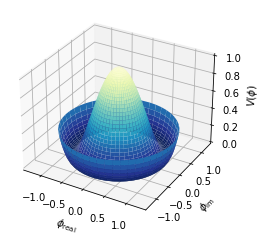

In [3]:
# Noch ein Weiterer 3D-Plot mit nur einem Subplot
# https://matplotlib.org/stable/gallery/mplot3d/surface3d_radial.html
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels. Mit dem Präfix r"..." kann man für die Achsenbeschriftungen auch TeX-Code verwenden 
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()